In [5]:
from utils import *
from metrics import *
from layers import *
from model import *
from optimizers import *
from initializers import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


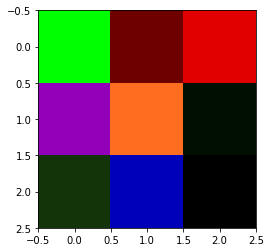

In [6]:
img = xavier_init(1,5,(3,3,3))
plt.imshow(img,cmap='RdYlBu_r')

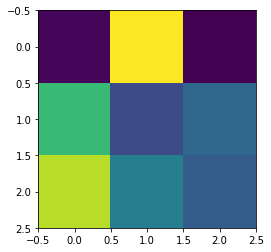

In [7]:
plt.imshow(img[0])

In [8]:
def zero_pad(batch,n):
    '''Pad image with n zeros'''
    return np.pad(batch,((0,0),(n,n),(n,n),(0,0)))

In [9]:
plt.imshow(padded[0])

NameError: name 'padded' is not defined

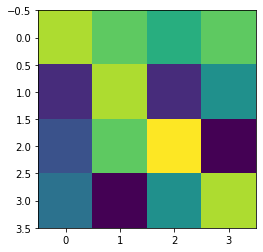

In [10]:
batch = np.random.randint(0,10,(1,4,4,3))
plt.imshow(batch[0,:,:,1])

In [11]:
batch[0,:,:,1]

array([[7, 6, 5, 6],
       [1, 7, 1, 4],
       [2, 6, 8, 0],
       [3, 0, 4, 7]])

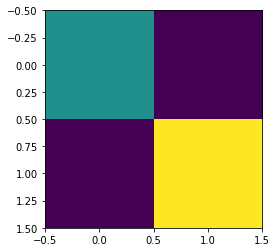

In [12]:
maxpool = MaxPooL2d(2)
output =  maxpool.forward(batch)
plt.imshow(output[0,:,:,1])

In [13]:
output[0,:,:,1]

array([[7., 6.],
       [6., 8.]])

In [14]:
np.random.randn(30, 10).T.shape

(10, 30)

In [15]:
batch = np.random.randint(0,10,(1,4,4,3))
batch

array([[[[5, 3, 3],
         [5, 8, 2],
         [0, 4, 7],
         [0, 4, 4]],

        [[4, 9, 7],
         [1, 3, 6],
         [7, 6, 3],
         [4, 0, 8]],

        [[3, 7, 1],
         [7, 7, 1],
         [8, 2, 9],
         [0, 5, 7]],

        [[1, 3, 8],
         [6, 3, 6],
         [6, 5, 6],
         [3, 8, 9]]]])

In [16]:
batch = batch.reshape(batch.shape[0],-1)
batch

array([[5, 3, 3, 5, 8, 2, 0, 4, 7, 0, 4, 4, 4, 9, 7, 1, 3, 6, 7, 6, 3, 4,
        0, 8, 3, 7, 1, 7, 7, 1, 8, 2, 9, 0, 5, 7, 1, 3, 8, 6, 3, 6, 6, 5,
        6, 3, 8, 9]])

In [17]:
dense = Dense(10,batch.shape[1])
dense.forward(batch)

AttributeError: can't set attribute

In [18]:
vect = np.random.randint(1,10,(5,5))
vect

array([[2, 3, 3, 4, 3],
       [9, 7, 3, 8, 9],
       [2, 7, 6, 5, 7],
       [5, 2, 7, 8, 8],
       [5, 6, 3, 9, 5]])

In [19]:
sm = softmax(vect)

In [20]:
max_pos = sm.argmax(axis=1)
max_pos

array([3, 0, 1, 3, 3], dtype=int64)

In [29]:
y_true = np.array([[0,0,0,1,0],[1,0,0,0,0],[0,1,0,0,0],[0,0,0,1,0],[0,0,0,1,0]])

In [31]:
accuracy(y_true,sm), categorical_cross_entropy(y_true,sm)

(1.0, 3.176849326551239)